# Data Preprocessing for Titanic Life Prediction

**About the Titanic Life Prediction**<br><br>
This project uses the built-in `titanic` dataset from the Seaborn library, which contains information about 891 passengers aboard the ill-fated voyage, representing approximately 40% of the actual passengers on board. Each row in the dataset represents a passenger, with various attributes that provide insights into their background, ticket information, and most importantly, whether they survived the disaster.

Logistic regression is particularly well-suited for the Titanic dataset because it addresses the fundamental classification problem inherent in the data: predicting whether a passenger survived or perished based on various predictor variables. The primary target variable (`survived`) is binary - passengers either survived (1) or died (0). Logistic regression is specifically designed for binary outcomes, making it a natural choice for this type of classification task. It doesn't just predict class labels; it provides probability estimates of survival.

## Libraries
- Numpy and pandas
- Matplotlib and Seaborn
- Warnings (to avoid minor errors)

# Tasks
- Import Libraries
- Load Dataset
- Understanding Dataset
- Sanity Check
- Exploratory Data Analysis
- Handling Missing Values
- Handle Categorical Values
- Handle Outliers
- Data Type Optimization
- Feature Engineering
- Save The File

# Import libraries

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
# loading dataset from seaborn library
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Dataset Description
| Column Name   | Data Type     | Description                                                                         |
| ------------- | ------------- | ----------------------------------------------------------------------------------- |
| `survived`    | int (0 or 1)  | Survival status (0 = No, 1 = Yes)                                                   |
| `pclass`      | int (1, 2, 3) | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)                                            |
| `sex`         | category      | Gender of the passenger (`male` or `female`)                                        |
| `age`         | float         | Age of the passenger in years                                      |
| `sibsp`       | int           | Number of siblings/spouses aboard                                                   |
| `parch`       | int           | Number of parents/children aboard                                                   |
| `fare`        | float         | Passenger fare (in British Pounds)                                                  |
| `embarked`    | category      | Port of embarkation (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton)          |
| `class`       | category      | Passenger class as a label (`First`, `Second`, `Third`)                             |
| `who`         | category      | Person type (`man`, `woman`, `child`)                                               |
| `adult_male`  | bool          | Whether the passenger is an adult male (`True` or `False`)                          |
| `deck`        | category      | Deck level (A–G); extracted from cabin number; missing if unknown                   |
| `embark_town` | category      | Name of town where the passenger boarded (`Cherbourg`, `Queenstown`, `Southampton`) |
| `alive`       | category      | Survival status as label (`yes`, `no`)                                              |
| `alone`       | bool          | Whether the passenger was alone (no family aboard)                                  |


## Understanding Dataset

In [4]:
# shape of the dataset
row, col = df.shape
print("Number of Rows:", row)
print("Number of Columns:", col)

Number of Rows: 891
Number of Columns: 15


In [5]:
# Quick Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Sanity Check
- Duplicate Handling
- Missing Value Description
- Drop Redundant Columns

## Handling Duplicates

In [7]:
# check duplicates
df.duplicated().sum()

np.int64(107)

In [8]:
# Check what makes records "duplicate"
duplicates = df[df.duplicated()]
print("Sample duplicates:")
print(duplicates.head(10))

Sample duplicates:
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
47          1       3  female   NaN      0      0   7.7500        Q   Third   
76          0       3    male   NaN      0      0   7.8958        S   Third   
77          0       3    male   NaN      0      0   8.0500        S   Third   
87          0       3    male   NaN      0      0   8.0500        S   Third   
95          0       3    male   NaN      0      0   8.0500        S   Third   
101         0       3    male   NaN      0      0   7.8958        S   Third   
121         0       3    male   NaN      0      0   8.0500        S   Third   
133         1       2  female  29.0      1      0  26.0000        S  Second   
173         0       3    male  21.0      0      0   7.9250        S   Third   
196         0       3    male   NaN      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
47   woman       False  NaN   Queenstown   yes   True  

**Note:**  We should not drop these duplicates for this dataset even though there are 107 duplicates among 891 entries.

**Why Keep Duplicates**
- *Real-World Reality:* Multiple passengers genuinely had identical characteristics
- *Historical Accuracy:* These represent actual people with same demographics
- *Small Dataset:* With only 891 records, removing 107 (12%) would significantly reduce our dataset
- *No True Duplicates:* Unlike data entry errors, these are legitimate similar cases

**What These Duplicates Likely Represent**
- Multiple passengers of the same age, class, gender traveling alone
- Families with similar characteristics
- Crew members or passengers with identical booking details

## Missing Value Description

In [9]:
# columns with missing values
df.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [10]:
# missing percantage
df.isnull().sum() / df.shape[0] * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

**Observation and Action**
- Missing Values Identified: `age`, `embarked`, `deck`, `embark_town`
- Immediate Actions: drop `deck`, handle `embark_town` and `embarked`.
- Future Actions: Validate imputations for `age`

In [11]:
# missing value
df[df["embarked"].isnull() == 1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


**NOTE:** Since there are only 2 missing values in the `embarked` and `embark_town` column, and they belong to passengers with very similar characteristics, we can impute with mode among similar passengers rather than drop.

In [12]:
# use the most common embarkation port for that passenger's class
common_embarked = df['embark_town'].mode()[0]
df['embark_town'] = df.groupby('pclass')['embark_town'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else common_embarked
)

In [13]:
# check imputation
df.iloc[[61, 829]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,Southampton,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,Southampton,yes,True


## Drop Redundant Columns
**Less Useful Columns:**
- `embarked` - Derived from `embark_town`
- `class` - Derived from `pclass`
- `adult_male` - Overlaps with `sex` and `who` columns
- `deck` - Too many missing values and may not have strong predictive power
- `alive` - Same as the target variable `survived`

In [14]:
df.drop(['deck', 'embarked', 'alive', 'adult_male', 'class'], axis=1, inplace=True)

In [15]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'who',
       'embark_town', 'alone'],
      dtype='object')

# Exploratory Data Analysis

In [16]:
# figure size
plt.figure(figsize=(8, 4))

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

## Histogram For Missing Value Data Distribution

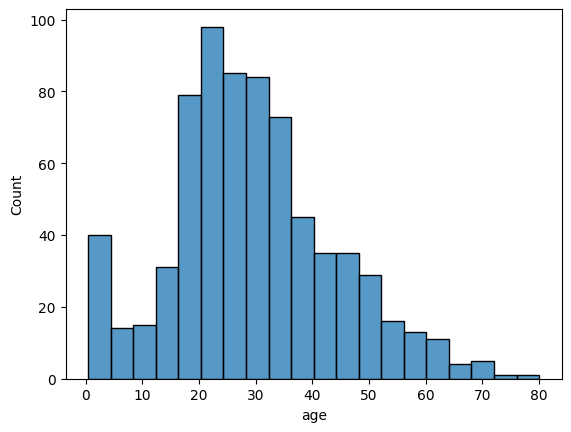

In [17]:
# 'age' variable disribution
sns.histplot(df['age'])
plt.show()

**Key Observations**
- The age distribution is right-skewed (positively skewed), meaning most passengers are younger.
- The peak age range is around 20–30 years, with the single most common group being 20–25.
- A significant number of passengers are below 10, suggesting many children on board.
- Fewer passengers are aged 60 and above.<br><br>

**Key Takeaway**
- The age data is not normally distributed, so using mean imputation may introduce bias.
- The presence of skewness suggests median imputation is more robust.
- There is variability across age groups, which aligns with the earlier boxplot findings—supporting segmentation-based imputation (e.g., by pclass, sex, or who).<br><br>

**Action**
- Impute missing age values using the median, possibly segmented by relevant categories

## Boxplot to Examine Missing Value Distribution Accross Different Variables

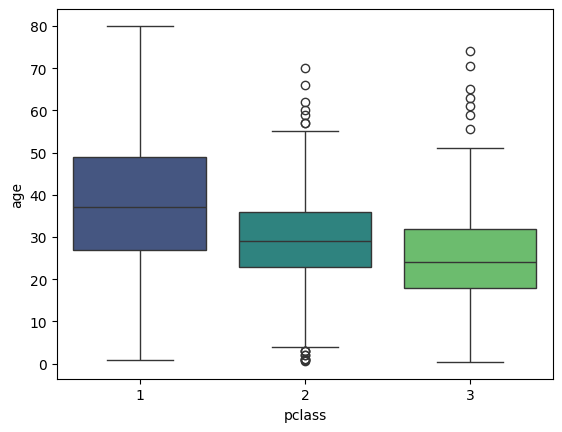

In [18]:
# examine 'age' distribution accross passenger class
sns.boxplot(data=df, x="pclass", y='age', palette='viridis')

# show plot
plt.show()

**Key Observations**
1. Median age decreases with lower class:
    - 1st class: ~37 years
    - 2nd class: ~29 years
    - 3rd class: ~24 years

2. Age range and distribution vary significantly across classes.
    - 1st class has the widest age spread with older passengers.
    - 3rd class has more young passengers.
3. Presence of outliers in all classes, especially in 2nd and 3rd.<br><br>

**Key Takeaway**
- There is a clear relationship between pclass and age, making pclass a strong candidate for estimating missing age values.<br><br>

**Action**
- Impute missing age values based on median or mean age within each pclass to preserve the relationship between class and age.

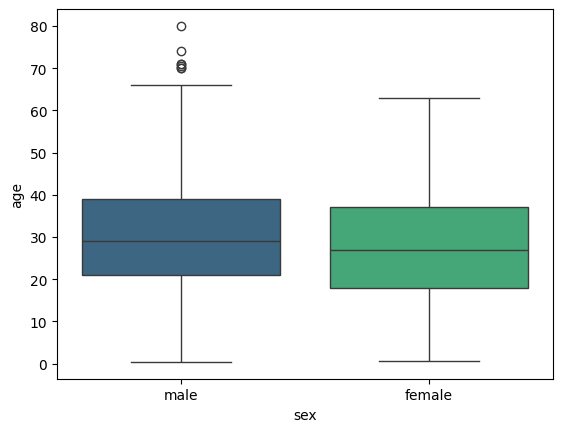

In [19]:
# examine 'age' distribution accross gender
sns.boxplot(data=df, x="sex", y='age', palette='viridis')

# show plot
plt.show()

**Key Observations**
- The boxplot shows the distribution of passenger ages (age) split by sex (male and female).
- Male Ages:
    - Median age is around 30–40 years.
    - The IQR is relatively wide, indicating variability in male ages.
    - There are a few outliers above the upper whisker (~60–70 years).
- Female Ages:
    - Median age is around 25–30 years.
    - The IQR is narrower compared to males, suggesting less variability.
    - There are no visible outliers.<br><br>

**Key Takeaway**
- Males tend to be slightly older on average compared to females.
- The age distribution for males is more spread out, while females have a more concentrated age range.
- The presence of outliers in males suggests variability in older male passengers, which may require further investigation.<br><br>

**Action**
- Consider segmenting age imputation by sex to account for these differences.
- Investigate the outliers in the male group to determine if they represent valid data or anomalies.
- Use median imputation for missing age values, potentially segmented by sex to preserve demographic patterns.

## Handling Missing Values

In [20]:
#  use group median age by sex and class
df['age'] = df.groupby(['sex', 'pclass'])['age'].transform(lambda x: x.fillna(x.median()))

In [21]:
# check missing value status
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
embark_town    0
alone          0
dtype: int64

## Univariate Analysis
- countplot for unique value distribution

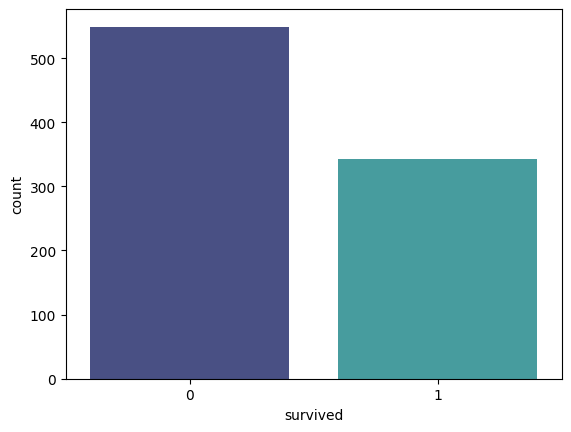

In [22]:
# countplot for survival
sns.countplot(data=df, x="survived", palette="mako")

# show plot
plt.show()

In [23]:
# exact value of total survived
df.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64